In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("stocks/ABEV.csv")

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

6381

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02539762],
       [0.02539762],
       [0.02539762],
       ...,
       [0.28029703],
       [0.28251354],
       [0.28235839]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02539762, 0.02539762, 0.02539762, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.02955359, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.02955359, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.02955359, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.02955359, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.02955359, 0.02955359, 0.02493581,
       0.02493581, 0.02493581, 0.02493581, 0.02493581, 0.02747561,
       0.02747561, 0.02747561, 0.02747561, 0.02747561, 0.02747561,
       0.02747561, 0.02747561, 0.02747561, 0.02747561, 0.02747561,
       0.02747561, 0.02747561, 0.02747561, 0.02747561, 0.02747561,
       0.02747561, 0.02747561, 0.02747561, 0.02747561, 0.02747561,
       0.02747561, 0.02747561, 0.02747561, 0.02747561, 0.02747561])]
[0.027475606361636377]

[array([0.02539762, 0.02539762, 0.02539762, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.02955359, 0.02955359, 0.02955359,
       0.02955359, 0.02955359, 0.0

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

6321/6321 [==============================] - 82s 13ms/step - loss: 6.9680e-04


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

prediction_std = np.std(predictions, axis=0)

# Print or use the result as needed
print("Standard Deviation of Predictions:", prediction_std)

11/11 [==============================] - 0s 10ms/step
Standard Deviation of Predictions: [0.19128093]


/var/folders/6x/002d9wvx0ln2cycd86pjbd740000gn/T/ipykernel_26097/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


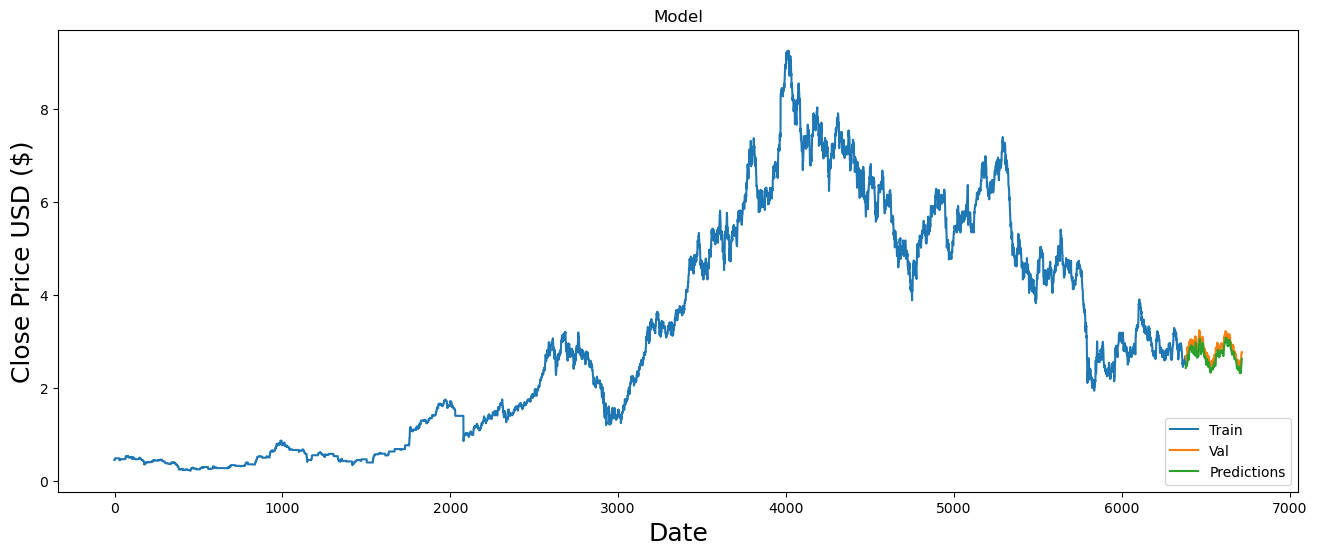

In [28]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()